## LeNet-5 Implementation in PyTorch 
---
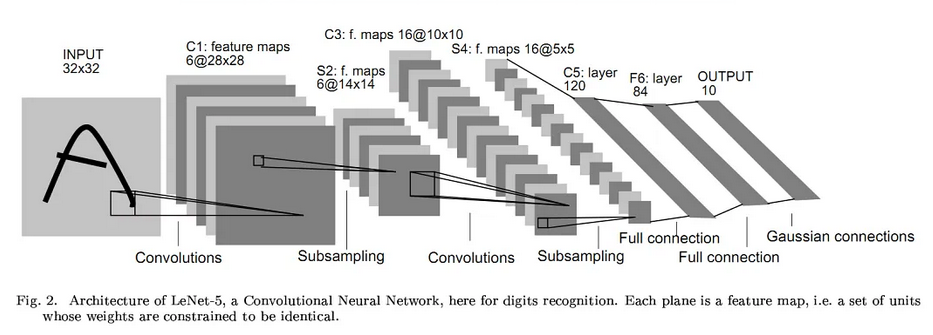
---
### Architecture
- LeNet-5 consists of Total seven layers (excluding the input layer).
    - **Input Layer**:
    - The size of the input image is uniformly normalized to 32 * 32.
    1. **Layer-C1**:
    - It is a convolutional layer with 6 feature maps.
    - The size of the feature map is 28 * 28.
    - It contains 156 (6 * (5*5+1)) trainable parameters and 122,304 connections.
    2. **Layer-S2**:
    - Sub-sampling layer with 6 feature maps of size 14 x 14.
    - Sampling area: 2 * 2
    - Sampling method: 4 inputs are added, multiplied by a trainable parameter, plus a trainable offset. Results via sigmoid
    -  12 training parameters and 5880 connections.
    3. **Layer-C3**:
    - Convolutional layer with 16 feature maps of size 10 x 10.
    - Uses 5x5 convolution kernels.
    - Not all S2 feature mapss are connected to C3.
    - Contains 1516 trainable parameters and 151600 connections.
    4. **Layer-S4**:
    - Sub-sampling layer with 16 feature maps of size 5 x 5.
    - Sampling area: 2 x 2
    - sampling method: Similar to S2, uses addition, trainable coefficient and trainable bias followed by Sigmoid.
    5. **Layer-C5**:
    - Convolutional layer with 120 feature maps of size 1 x 1.
    - Each unit connected to all 400 nodes (16 x 5 x 5) in S4/
    - Uses 5 x 5 convolution kernels.
    - Contains 48,120 trainable parameters and has 48,120 connections.
    6. **Layer-F6**:
    - Fully-connected layer with 85 units.
    - Each unit in F6 is connected to every feature map in C5.
    - Contains 10,164 trainable parameters and uses sigmoid activation function.
    7. **Output Layer**:
    - Fully connected layer with 10 units (for 10 classes)
    - Uses Gaussian connections to F6
    - Contains 60,480 trainable parameters and 341,908 total number of connections. 

## Implementation 

In [65]:
import torch 
import torch.nn as nn 
import torch.optim as optim 
import torchvision 
import torchvision.transforms as transforms 
from torch.utils.data import DataLoader

In [80]:
BATCH_SIZE = 64 
num_classes = 10
learning_rate = 0.01
num_epochs = 10 

# Device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu') 

train_dataset = torchvision.datasets.MNIST(root = './data',
                                               train = True,
                                               transform = transforms.Compose([
                                                      transforms.Resize((32,32)),
                                                      transforms.ToTensor(),
                                                      transforms.Normalize(mean = (0.1307,), std = (0.3081,))]),
                                               download = True)
trainloader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True, num_workers=2)


test_dataset = torchvision.datasets.MNIST(root = './data',
                                              train = False,
                                              transform = transforms.Compose([
                                                      transforms.Resize((32,32)),
                                                      transforms.ToTensor(),
                                                      transforms.Normalize(mean = (0.1325,), std = (0.3105,))]),
                                              download=True)
testloader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False, num_workers=2)

In [86]:
 class LeNet5(nn.Module):
    def __init__(self, num_classes):
        super(LeNet5, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Conv2d(1, 6, kernel_size=5, stride=1, padding=0),
            nn.BatchNorm2d(6),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size = 2, stride = 2))
        self.layer2 = nn.Sequential(
            nn.Conv2d(6, 16, kernel_size=5, stride=1, padding=0),
            nn.BatchNorm2d(16),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size = 2, stride = 2))
        self.fc = nn.Linear(400, 120)
        self.relu = nn.ReLU()
        self.fc1 = nn.Linear(120, 84)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(84, num_classes)
            
    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = out.reshape(out.size(0), -1)
        out = self.fc(out)
        out = self.relu(out)
        out = self.fc1(out)
        out = self.relu1(out)
        out = self.fc2(out)
        return out


In [87]:
# initalize model, loss_fn, and optimizer 

model = LeNet5(num_classes).to(device)
criterion = nn.CrossEntropyLoss() 
optimizer = optim.SGD(model.parameters(), lr=learning_rate, momentum=0.9)
total_step = len(trainloader)

In [89]:
# Training loop
total_step = len(trainloader)

for epoch in range(num_epochs):
     for i, (images, labels) in enumerate(trainloader):
         images = images.to(device)
         labels = labels.to(device)
         # forward pass
         outputs = model(images)
         loss = criterion(outputs, labels)
         # backward and optimize 
         optimizer.zero_grad()
         loss.backward()
         optimizer.step()
         if (i+1) % 400 == 0:
             print(f'Epoch [{epoch+1} / {num_epochs}], Step [{i+11}/{total_step}], Loss:{loss.item():.4f}')

print('Finished Training')

Epoch [1 / 10], Step [410/938], Loss:0.1648
Epoch [1 / 10], Step [810/938], Loss:0.0635
Epoch [2 / 10], Step [410/938], Loss:0.0143
Epoch [2 / 10], Step [810/938], Loss:0.0284
Epoch [3 / 10], Step [410/938], Loss:0.0612
Epoch [3 / 10], Step [810/938], Loss:0.0091
Epoch [4 / 10], Step [410/938], Loss:0.0432
Epoch [4 / 10], Step [810/938], Loss:0.0028
Epoch [5 / 10], Step [410/938], Loss:0.0052
Epoch [5 / 10], Step [810/938], Loss:0.1193
Epoch [6 / 10], Step [410/938], Loss:0.0007
Epoch [6 / 10], Step [810/938], Loss:0.0555
Epoch [7 / 10], Step [410/938], Loss:0.0047
Epoch [7 / 10], Step [810/938], Loss:0.0286
Epoch [8 / 10], Step [410/938], Loss:0.0025
Epoch [8 / 10], Step [810/938], Loss:0.0021
Epoch [9 / 10], Step [410/938], Loss:0.0084
Epoch [9 / 10], Step [810/938], Loss:0.0869
Epoch [10 / 10], Step [410/938], Loss:0.0004
Epoch [10 / 10], Step [810/938], Loss:0.0189
Finished Training


In [ ]:
# Epoch [1/10], Step [400/938], Loss: 2.3440
# Epoch [1/10], Step [800/938], Loss: 2.3226
# Epoch [2/10], Step [400/938], Loss: 2.3158
# Epoch [2/10], Step [800/938], Loss: 2.3144
# Epoch [3/10], Step [400/938], Loss: 2.3161
# Epoch [3/10], Step [800/938], Loss: 2.2866
# Epoch [4/10], Step [400/938], Loss: 2.3170
# Epoch [4/10], Step [800/938], Loss: 2.3102
# Epoch [5/10], Step [400/938], Loss: 2.2958
# Epoch [5/10], Step [800/938], Loss: 2.3054
# Epoch [6/10], Step [400/938], Loss: 2.3143
# Epoch [6/10], Step [800/938], Loss: 2.3141
# Epoch [7/10], Step [400/938], Loss: 2.3164
# Epoch [7/10], Step [800/938], Loss: 2.3336
# Epoch [8/10], Step [400/938], Loss: 2.2971
# Epoch [8/10], Step [800/938], Loss: 2.3114
# Epoch [9/10], Step [400/938], Loss: 2.2945
# Epoch [9/10], Step [800/938], Loss: 2.3104
# Epoch [10/10], Step [400/938], Loss: 2.3074
# Epoch [10/10], Step [800/938], Loss: 2.3110
# Finished Training

# training with previous net 